## 언어 생성 AI

### chatgpt API 모듈로 질문하고 답변 받기(답변 형식 살펴보기)

In [ ]:
# gpt와 대화를 주고받을 수 있는 모듈 설치하기

!pip install openai

In [ ]:
import openai

my_chat = openai.OpenAI(api_key = "sk-proj-mEI2cheKqQRJZWlH9zEdT3BlbkFJRi7LLPPVkkEHNNST4???")

In [ ]:
# gpt에게 질문하고 답변 받기

response = my_chat.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[{"role": "user", "content": "코믹 영화 추천해 줘."}],
  max_tokens=1000
)

In [ ]:
response

ChatCompletion(id='chatcmpl-9ZDkSDMlS6O9SaMvY2s3Q36P5V4WM', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='1. "Deadpool" - 라이언 레이놀즈가 주연으로 출연하는 이 영화는 블랙 코미디와 액션을 섞어 만들어진 코믹 영화로, 극한 상황에서도 유머 감각을 잃지 않는 주인공 데드풀의 모험을 그린다.\n\n2. "아메리칸 울트라" - 패티젠킄감독의 작품으로, 슈퍼히어로 캐릭터들이 일상생활 속에서 발생하는 괴로움과 유머를 통해 보여주는 영화.\n\n3. "쏘우" - 레브 로버트슨이 주연으로 나서는 독특한 컨셉의 코믹 영화로, 황당한 상황과 빅터를 향한 비극적인 연기로 웃음을 선사한다.\n\n4. "오즈의 마법사" - 이 영화는 마법의 소노 젤리오와 함께 모험을 떠나는 주인공들이 살아가는 동화같은 이야기를 담고 있다.\n\n5. "죄와 벌" - 주인공들이 광기 어린 모험을 찾아나서는 극적인 코믹 영화로, 이전에 본 어떤 영화와도 다른 즐거움을 선사한다.\n\n이 영화들을 즐기시면 좋을 것 같아요. 😊', role='assistant', function_call=None, tool_calls=None))], created=1718181356, model='gpt-3.5-turbo-0125', object='chat.completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=448, prompt_tokens=21, total_tokens=469))

```
ChatCompletion(
    id='chatcmpl-9Tjrb3M7ktlN2l6AJV3z41TwQAbT5',
    choices=[
        Choice(finish_reason='length', index=0, logprobs=None,
            message=ChatCompletionMessage(
               content='1. "Deadpool" - 라이언 레이놀즈가 주연으로 ~~~ 좋을 것 같아요. 😊',
               role='assistant',
               function_call=None,
               tool_calls=None)
        )
    ],
    created=1716874839,
    model='gpt-3.5-turbo-0125',
    object='chat.completion',
    system_fingerprint=None,
    usage=CompletionUsage(completion_tokens=100, prompt_tokens=21, total_tokens=121)
)
```

In [ ]:
response.choices[0].message.content

'1. "Deadpool" - 라이언 레이놀즈가 주연으로 출연하는 이 영화는 블랙 코미디와 액션을 섞어 만들어진 코믹 영화로, 극한 상황에서도 유머 감각을 잃지 않는 주인공 데드풀의 모험을 그린다.\n\n2. "아메리칸 울트라" - 패티젠킄감독의 작품으로, 슈퍼히어로 캐릭터들이 일상생활 속에서 발생하는 괴로움과 유머를 통해 보여주는 영화.\n\n3. "쏘우" - 레브 로버트슨이 주연으로 나서는 독특한 컨셉의 코믹 영화로, 황당한 상황과 빅터를 향한 비극적인 연기로 웃음을 선사한다.\n\n4. "오즈의 마법사" - 이 영화는 마법의 소노 젤리오와 함께 모험을 떠나는 주인공들이 살아가는 동화같은 이야기를 담고 있다.\n\n5. "죄와 벌" - 주인공들이 광기 어린 모험을 찾아나서는 극적인 코믹 영화로, 이전에 본 어떤 영화와도 다른 즐거움을 선사한다.\n\n이 영화들을 즐기시면 좋을 것 같아요. 😊'

### GPT 채팅 프로그램 만들어 보기

#### 0단계 : 기본코드 - 코드에 질문을 쓰고 출력하기.

In [ ]:
response = my_chat.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[{"role": "user", "content": "코믹 영화 추천해 줘."}],
  max_tokens=1000
)

print(response.choices[0].message.content)

#### 1단계 : 실행 중 질문을 입력하고, 응답받기

In [ ]:
request = input("나의 말 : ")

response = my_chat.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
              {"role": "system", "content": "묻는 말에 100글자 이내로 대답해 줘."},
              {"role": "user", "content": request}
    ]
)

print("GPT의 말 : ", response.choices[0].message.content)

나의 말 : 너는 누구니?
GPT의 말 :  나는 AI 기반 대화형 가상 비서이며, 정보 제공, 질문에 답변, 업무 지원 등 다양한 기능을 수행합니다. 무엇을 도와드릴까요?


#### 2단계 : 대화(질문/답변) 계속 반복하기

In [ ]:
while True :
    request = input("나의 말 : ")

    response = my_chat.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
                 {"role": "system", "content": "묻는 말에 100글자 이내로 대답해 줘."},
                 {"role": "user", "content": request}
        ]
    )

    print("GPT의 말 : ", response.choices[0].message.content)

위 코드 실행 예시
>>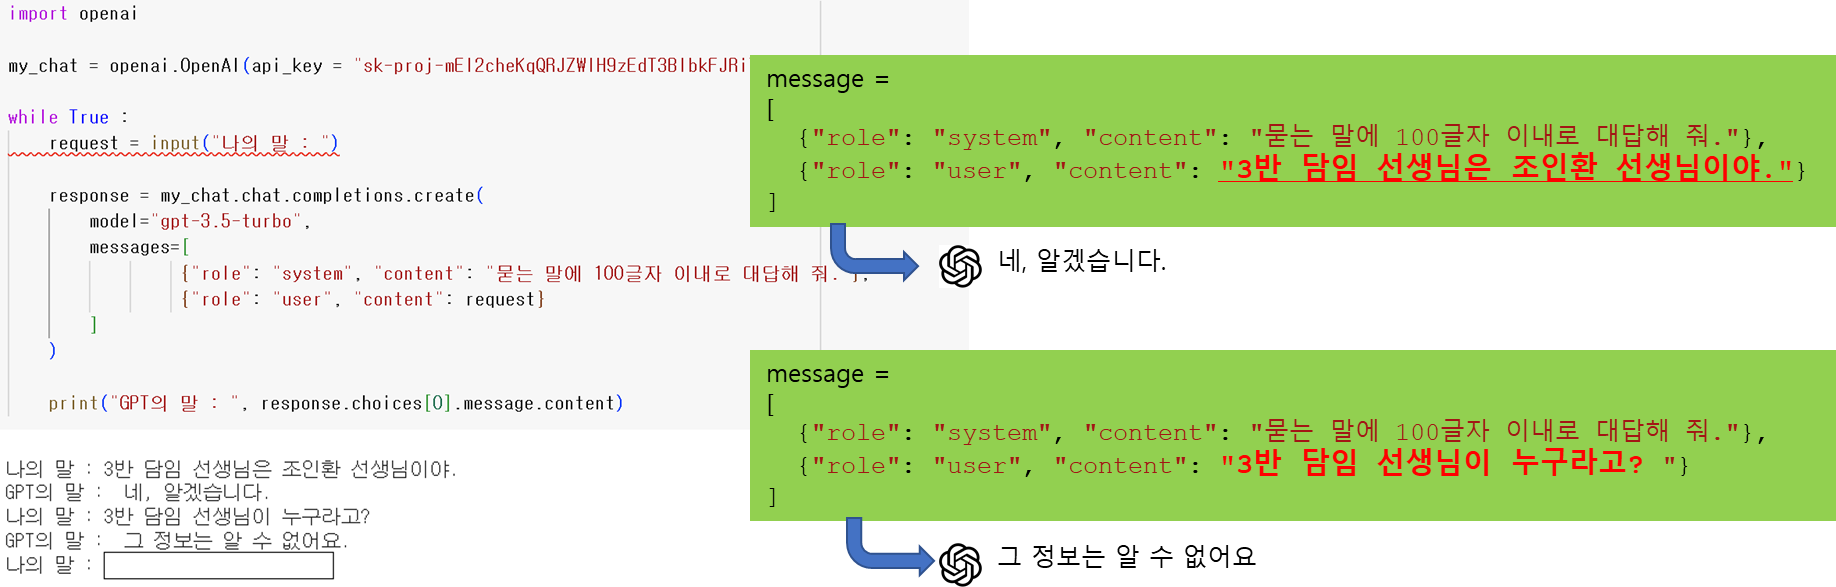

#### 3단계 : 주고 받은 대화 목록을 계속 저장하기

In [ ]:
message_box = [{"role": "system", "content": "묻는 말에 100글자 이내로 대답해 줘."}]

while True :
    request = input("나의 말 : ")

    message_box.append({"role": "user", "content": request}) # 내 말을 담기

    response = my_chat.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=message_box
    )


    answer = response.choices[0].message.content

    message_box.append({"role": "assistant", "content": answer}) # GPT 말을 담기

    print("GPT의 말 : ", answer)

위 코드 실행 예시
> > 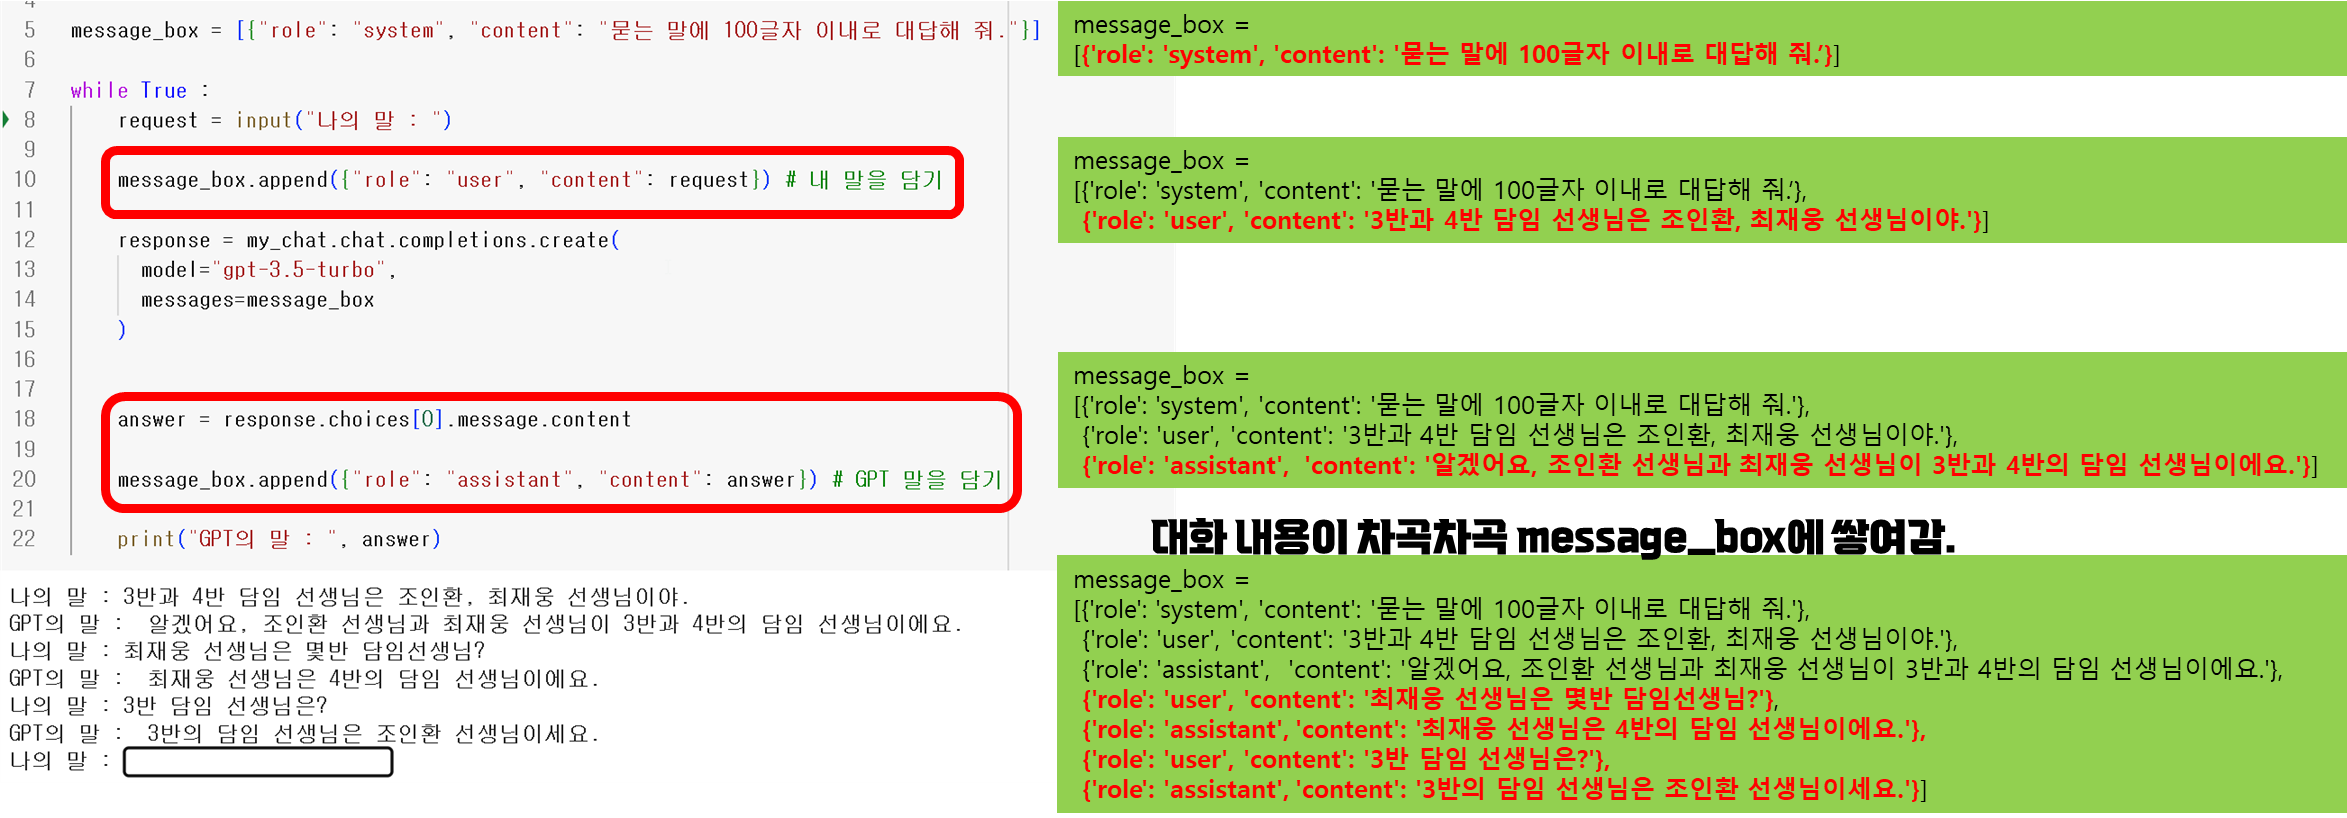

In [ ]:
# 주고받은 대화 내용 출력해 보기.

message_box

[{'role': 'system', 'content': '묻는 말에 100글자 이내로 대답해 줘.'},
 {'role': 'user', 'content': '3반과 4반 담임 선생님은 조인환, 최재웅 선생님이야.'},
 {'role': 'assistant',
  'content': '알겠어요, 조인환 선생님과 최재웅 선생님이 3반과 4반의 담임 선생님이에요.'},
 {'role': 'user', 'content': '최재웅 선생님은 몇반 담임선생님?'},
 {'role': 'assistant', 'content': '최재웅 선생님은 4반의 담임 선생님이에요.'},
 {'role': 'user', 'content': '3반 담임 선생님은?'},
 {'role': 'assistant', 'content': '3반의 담임 선생님은 조인환 선생님이세요.'}]

#### 4단계 : (대화 종료를 의미하는 말을 했을 때) 끝낼 수 있도록...

In [ ]:
message_box = [{"role": "system", "content": """
                묻는 말에 100글자 이내로 대답해 줘.
                사람이 "끝"이나 "종료"를 나타내는 말을 하면,
                너는 반드시 'END'라고만 출력 해야해...
              """}]

while True :
    request = input("나의 말 : ")

    message_box.append({"role": "user", "content": request}) # 내 말을 담기

    response = my_chat.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=message_box
    )


    answer = response.choices[0].message.content

    message_box.append({"role": "assistant", "content": answer}) # GPT 말을 담기

    print("GPT의 말 : ", answer)

위 코드 실행 예시
> >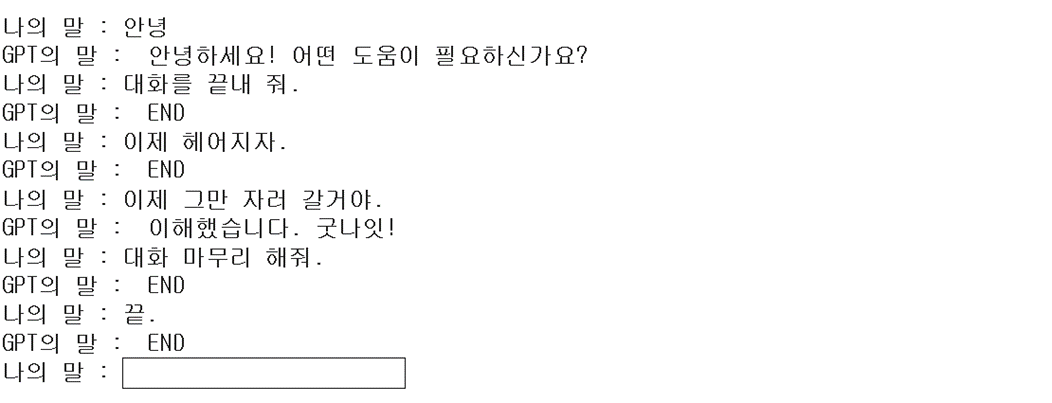

In [ ]:
message_box = [{"role": "system", "content": """
                묻는 말에 100글자 이내로 대답해 줘.
                사람이 "끝"이나 "종료"를 나타내는 말을 하면,
                너는 반드시 'END'라고만 출력 해야해...
              """}]

while True :
    request = input("나의 말 : ")

    message_box.append({"role": "user", "content": request}) # 내 말을 담기

    response = my_chat.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=message_box
    )


    answer = response.choices[0].message.content

    message_box.append({"role": "assistant", "content": answer}) # GPT 말을 담기

    if ?????????????????

    print("GPT의 말 : ", answer)

### Gradio로 채팅 웹사이트 만들어 보기

The Interface class : https://www.gradio.app/guides/the-interface-class

In [ ]:
!pip install -q gradio

In [ ]:
# 채팅 예시 코드 가져와 보기

import random
import gradio as gr

def random_response(message, history):
    return "re" + message)


gr.ChatInterface(random_response).launch()

In [ ]:
import random
import gradio as gr

message_box = [{"role": "system", "content": "묻는 말에 100글자 이내로 대답해 줘."}]

def alternatingly_agree(message, history):
    message_box.append({"role": "user", "content": ??????????})

    response = my_chat.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=message_box
    )

    answer = response.choices[0].message.content

    message_box.append({"role": "assistant", "content": ??????????})


    return answer


gr.ChatInterface(alternatingly_agree).launch()

In [ ]:
# history라는 것에 자동으로 주고받은 대화 내용이 쌓이는 것 같음...
# 이걸 잘 활용하면 더 쉬워질 것 같음...

##**중요 : 지금부터는 GPU 설정하고 실습하기 바랍니다.**

In [ ]:
# GPU 할당 확인해 보기

!nvidia-smi

### 필요하면 사용(구글 번역 API), GPT는 번역도 잘 함.

In [ ]:
!pip install googletrans==4.0.0-rc.1

In [2]:
from googletrans import Translator

translator = Translator()

prompt = "안녕, 내 이름은 홍길동이야."

kor2eng = translator.translate(prompt, dest='en').text
eng2kor = translator.translate(kor2eng, dest='ko').text

print(kor2eng)
print(eng2kor)

Hello, my name is Hong Gil -dong.
안녕하세요, 제 이름은 Hong Gil -dong입니다.


## 이미지 생성 AI

#### Stable Diffusion 2.1 모델을 이용하여 이미지 생성

In [ ]:
!pip install diffusers accelerate

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
from diffusers.utils import load_image

In [ ]:
model_path = "stabilityai/stable-diffusion-2-1-base"

pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

### 영어로 그리고 싶은 그림을...
### 원하는 그림을 얻고 싶으면, 구글에서 stable diffusion 프롬프트 엔지니어링 으로 검색
prompt = "Animal photo: a cat under the snow with blue eyes, covered by snow, cinematic style, medium shot, professional photo, animal"

image = pipe(prompt, num_inference_steps=30, guidance_scale=7.5).images[0]
image.save("my_image.png")

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
from diffusers.utils import load_image

model_path = "stabilityai/stable-diffusion-2-1-base"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

image = pipe(prompt, num_inference_steps=30, guidance_scale=7.5).images[0]
image.save("my_image.png")

## 음악 생성형 AI

#### MusicGen으로 음악 만들기

In [ ]:
# 음악을 생성하는 코드
from transformers import AutoProcessor, MusicgenForConditionalGeneration

processor = AutoProcessor.from_pretrained("facebook/musicgen-small")
model = MusicgenForConditionalGeneration.from_pretrained("facebook/musicgen-small")

inputs = processor(
    text=["80s pop track with bassy drums and synth", "90s rock song with loud guitars and heavy drums"],
    padding=True,
    return_tensors="pt",
)

audio_values = model.generate(**inputs, max_new_tokens=256)

In [ ]:
# 위에서 생성한 음악을 파일로 저장하는 코드
import scipy

sampling_rate = model.config.audio_encoder.sampling_rate
scipy.io.wavfile.write("my_music.wav", rate=sampling_rate, data=audio_values[0, 0].numpy())